In [15]:
# Importing Libraries
import numpy as np
import pandas as pd

In [16]:
# Importing Dataset
df = pd.read_csv('Restaurant_reviews.csv',delimiter = '\\t',quoting = 3)
print(df)

<ipython-input-16-089077a5143c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Restaurant_reviews.csv',delimiter = '\\t',quoting = 3)


                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [17]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [18]:
## Checking Missing Values
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missin_data = pd.concat([count,percentage],axis = 1,keys=['count','Percentage'])
print(missin_data)

        count  Percentage
Liked       0         0.0
Review      0         0.0


In [19]:
df.shape

(1000, 2)

Percentage for Defalut
1    50.0
0    50.0
Name: Liked, dtype: float64


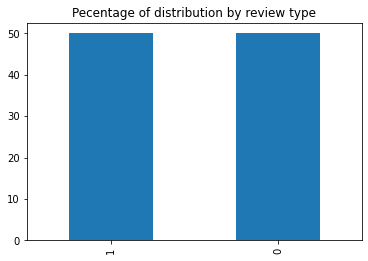

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for Defalut")
print(round(df.Liked.value_counts(normalize=True)*100,2))
round(df.Liked.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Pecentage of distribution by review type')
plt.show()

In [21]:
# Refining the Data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # this list will contain all the refined reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [58]:
for i in range(0,1000):
    review = df['Review'][i] # collecting the reviews one by one
    review = re.sub('[^a-zA-Z]',' ',review)  # relacing the punctuations with space
    review = review.lower()  # converting all the characters to lowercase
    review = review.split() # converting a statement to list of words
    ps = PorterStemmer() # creating the object for PorterStemmer class
    all_stopwords = stopwords.words('english') # collecting the english language stopwords
    #removing not words from the stopwords
    st = ['not','no','don',"don't",'wasn',"wasn't", 'weren', "weren't", 'won', "won't",'wouldn', "wouldn't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',"shouldn't"]
    for stop in range(len(st)):
        all_stopwords.remove(st[stop])
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    #coverting the list of words back to statement using 'join()
    review = ' '.join(review)
    corpus.append(review)
#print(corpus)
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [66]:
##Creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
# using max_features parameter of CountVectorizer limits the number of columns in x
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [98]:
#creating a vocabulary(list of all words)
vocab = []
for i in corpus:
    words = i.split()
    vocab.extend(words)
# print(vocab)
#removing repeated words in vocab
unq_words = list(set(vocab))
# print(unq_words)
len(unq_words)

1580

In [99]:
# Frequency Count Method
#creating a vocabulary(list of all word
vocab = []
for i in corpus:
    words = i.split()
    vocab.extend(words)
# print(vocab)\n",
#removing repeated words in vocab
unq_words = list(set(vocab))
print(unq_words)
len(unq_words)

['nasti', 'teeth', 'tummi', 'chines', 'truli', 'late', 'tucson', 'pumpkin', 'flavour', 'ring', 'fun', 'poorli', 'tough', 'calamari', 'spici', 'kind', 'mean', 'crouton', 'cart', 'vodka', 'basic', 'unbeliev', 'believ', 'chees', 'roast', 'jamaican', 'slice', 'min', 'guy', 'wildli', 'write', 'four', 'think', 'bland', 'sinc', 'equal', 'cheeseburg', 'sashimi', 'whelm', 'work', 'disapppoint', 'famou', 'gold', 'pancak', 'legit', 'patron', 'tragedi', 'cashew', 'worri', 'teamwork', 'waiter', 'bottom', 'im', 'lil', 'daili', 'overpr', 'super', 'cashier', 'wrong', 'older', 'yelper', 'wine', 'classi', 'pleasant', 'either', 'mention', 'yummi', 'dine', 'way', 'promis', 'flavorless', 'would', 'peopl', 'sauc', 'khao', 'sushi', 'wish', 'bloodi', 'call', 'refri', 'pe', 'ninja', 'andddd', 'offer', 'vinegrett', 'rge', 'hut', 'array', 'vanilla', 'anoth', 'denni', 'five', 'focus', 'egg', 'ahead', 'happier', 'limit', 'full', 'pale', 'wall', 'cocktail', 'pork', 'indoor', 'offici', 'pea', 'friendli', 'attach', '

1580

In [100]:
## Creating a dictionary
yslist = df.iloc[:,-1].values
#print(yslist)
print(len(yslist))
print(len(corpus))
freqs = {}
for y, review in zip(yslist, corpus):
    print(y,review)
    for word in review.split():
        pair = (word, y)
        #print(pair)
        if pair in freqs:
            freqs[pair] += 1
        else:
            freqs[pair] = 1
    
print(freqs)

1000
1000
1 wow love place
0 crust not good
0 not tasti textur nasti
1 stop late may bank holiday rick steve recommend love
1 select menu great price
0 get angri want damn pho
0 honeslti didn tast fresh
0 potato like rubber could tell made ahead time kept warmer
1 fri great
1 great touch
1 servic prompt
0 would not go back
0 cashier no care ever say still end wayyy overpr
1 tri cape cod ravoli chicken cranberri mmmm
0 disgust pretti sure human hair
0 shock no sign indic cash
1 highli recommend
0 waitress littl slow servic
0 place not worth time let alon vega
0 not like
0 burritto blah
1 food amaz
1 servic also cute
1 could care less interior beauti
1 perform
1 right red velvet cake ohhh stuff good
0 never brought salad ask
1 hole wall great mexican street taco friendli staff
0 took hour get food tabl restaur food luke warm sever run around like total overwhelm
0 worst salmon sashimi
1 also combo like burger fri beer decent deal
0 like final blow
1 found place accid could not happier
0 

0 place not qualiti sushi not qualiti restaur
1 would definit recommend wing well pizza
1 great pizza salad
0 thing went wrong burn saganaki
0 wait hour breakfast could done time better home
1 place amaz
0 hate disagre fellow yelper husband disappoint place
0 wait hour never got either pizza mani around us came later
0 don know slow
1 staff great food delish incred beer select
0 live neighborhood disappoint won back conveni locat
1 didn know pull pork could soooo delici
1 get incred fresh fish prepar care
0 go gave star rate pleas know third time eat bachi burger write review
1 love fact everyth menu worth
0 never dine place
1 food excel servic good
1 good beer drink select good food select
0 pleas stay away shrimp stir fri noodl
0 potato chip order sad could probabl count mani chip box probabl around
0 food realli bore
1 good servic check
0 greedi corpor never see anoth dime
0 never ever go back
0 much like go back get pass atroci servic never return
1 summer dine charm outdoor patio 

0 whole experi underwhelm think go ninja sushi next time
0 hadn wast enough life pour salt wound draw time took bring check
{('wow', 1): 3, ('love', 1): 30, ('place', 1): 60, ('crust', 0): 2, ('not', 0): 98, ('good', 0): 22, ('tasti', 0): 3, ('textur', 0): 2, ('nasti', 0): 3, ('stop', 1): 5, ('late', 1): 1, ('may', 1): 3, ('bank', 1): 1, ('holiday', 1): 1, ('rick', 1): 1, ('steve', 1): 1, ('recommend', 1): 11, ('select', 1): 10, ('menu', 1): 13, ('great', 1): 70, ('price', 1): 16, ('get', 0): 18, ('angri', 0): 1, ('want', 0): 10, ('damn', 0): 3, ('pho', 0): 3, ('honeslti', 0): 1, ('didn', 0): 9, ('tast', 0): 12, ('fresh', 0): 4, ('potato', 0): 3, ('like', 0): 31, ('rubber', 0): 1, ('could', 0): 8, ('tell', 0): 3, ('made', 0): 6, ('ahead', 0): 1, ('time', 0): 29, ('kept', 0): 4, ('warmer', 0): 1, ('fri', 1): 7, ('touch', 1): 2, ('servic', 1): 47, ('prompt', 1): 1, ('would', 0): 22, ('go', 0): 39, ('back', 0): 38, ('cashier', 0): 1, ('no', 0): 23, ('care', 0): 1, ('ever', 0): 19, ('say',

In [101]:
## Feature  Extraction
x = np.zeros((1000,3),dtype = int)
#setting bias terms i.e., 1
for i in range(1000):
    x[i,0] = 1

for i,review in zip(range(1000),corpus):
    for word in review.split():
        # increment the word count for the positive label 1
        x[i,1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[i,2] += freqs.get((word, 0.0),0)
print(x)

[[  1  93  55]
 [  1  91 122]
 [  1  27 106]
 ...
 [  1  94 307]
 [  1  76 107]
 [  1  40  68]]


In [107]:
x_ind = x

In [108]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_ind = pca.fit_transform(x_ind)
var = pca.explained_variance_ratio_
print(var)

[0.80873661 0.19126339]


In [112]:
# Train/Test Split"
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,yslist,test_size = 0.2,random_state = 6)

In [116]:
# Model - 1 - Support Vector Machine (SVM)"
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svm = SVC(kernel = 'linear',random_state = 6)


In [117]:
## Creating Pipeline
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',svm)])
model.fit(x_train,y_train)


Pipeline(steps=[('classifier', SVC(kernel='linear', random_state=6))])

In [118]:
## Prediction
yhat = model.predict(x_test)
   

0.905


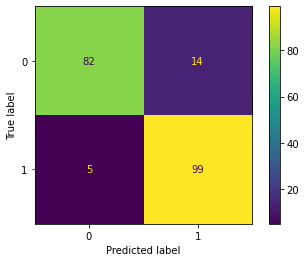

In [119]:
## Plotting Confusion Matrix and Calculating Accuracy Score
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = svm ,X = x_test, y_true = y_test)
print(accuracy_score(yhat,y_test))

In [120]:
# Model - 2 - K Nearest Neighbor (KNN) "
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)


In [121]:
# Creating Pipeline
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',knn)])
model.fit(x_train,y_train)

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=10))])

In [122]:
## Prediction"
yhat = model.predict(x_test)


0.905


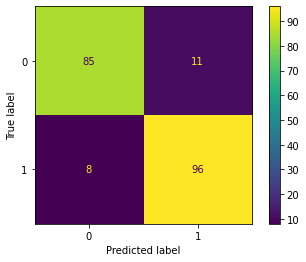

In [123]:
## Plotting Confusion Matrix and Calculating Accuracy Score
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = knn ,X = x_test, y_true = y_test)
print(accuracy_score(yhat,y_test))

In [124]:
# Model - 3 - Support Vector Machine with PCA (SVM with PCA)"
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x_ind,yslist,test_size = 0.2,random_state = 6)


In [125]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svm = SVC(kernel = 'linear',random_state  = 6)


In [126]:
## Creating Pipeline
from sklearn.pipeline import Pipeline
model = Pipeline([('classifier',svm)])
model.fit(x_tr,y_tr)


Pipeline(steps=[('classifier', SVC(kernel='linear', random_state=6))])

In [127]:
## Prediction
y_pr = model.predict(x_te)

0.905


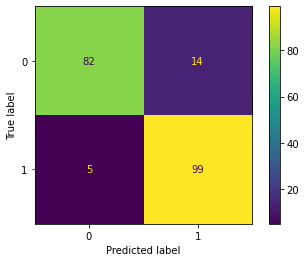

In [128]:
## Plotting Confusion Matrix and Calcuating accuracy score.
from sklearn.metrics import plot_confusion_matrix,accuracy_score
plot_confusion_matrix(estimator = svm ,X = x_te, y_true = y_te)
print(accuracy_score(yhat,y_test))
